# Introduction

### Let's help Yandex.Afisha to optimize marketing expenses from this data:

- Server logs with data on Yandex.Afisha visits from January 2017 through December 2018
- Dump file with all orders for the period
- Marketing expenses statistics

### Let's answer the following questions

- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

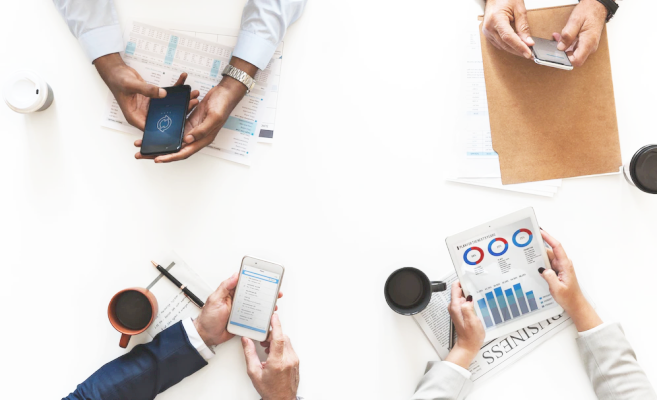

<a class="anchor" id="index"></a>


# Contents Table

### [ General information](#step1)


### [ Product Metrics](#step2)
- [DAU, WAU,MAU](#step2a)
- [Sessions  per day](#step2b)
- [Sessions Lenght](#step2c)
- [Retenction](#step2d)

### [ Sales](#step3)
- [ First Order](#step3a)
- [ Order Quantity](#step3b)
- [ The average purchase size](#step3c)
- [ LTV](#step3d)



### [ Marketing](#step4)
- [ Marketing Costs](#step4a)
- [ CAC](#step4b)
- [ ROI](#step4c)

### [ General Conclusions](#step5)

<hr>

<a class="anchor" id="step1"></a>
# Step 1 General  Information

In [1]:
# importing the libraries:

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
try:
    visits = pd.read_csv('visits_log_us.csv')
    orders = pd.read_csv('orders_log_us.csv')
    costs = pd.read_csv('costs_us.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_log_us.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_log_us.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_us.csv')    

In [3]:
def csv_check(file):
    
    
    print(file.info())
    print('____________________________________________________________')
    print('')   
    print('')   
    print (file.head())
    print('____________________________________________________________')
    print('')   
    print('')   
    print('')   

In [4]:
for i in [visits, orders, costs]:
    csv_check(i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
____________________________________________________________


    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  

In [5]:
#optimizing the data - to_datetime
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'])
visits['End Ts'] =  pd.to_datetime(visits['End Ts']) 
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'])
costs['dt'] =  pd.to_datetime(costs['dt']) 


In [6]:
for i in [visits, orders, costs]:
    i.columns = map(str.lower, i.columns)
    print (i.info(memory_usage='deep'))
    print('')
    print (i.head())
    print('____________________________________________________________')
    print('')   
    print('') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 32.7 MB
None

    device              end ts  source id            start ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  

<a class="anchor" id="step2"></a>

       
#      Step 2  Product Metrics:

    


<a class="anchor" id="step2a"></a>
<div style="background-color:#cccfff">

###     1. How many people use it every day, week, and month? (DAU, WAU,MAU)
    
</div>

In [7]:
#Let's create new columns to define the usage of the product by periods of time
visits['day']=visits['start ts'].astype('datetime64[D]')
visits['week']=visits['start ts'].astype('datetime64[W]')
visits['month']=visits['start ts'].astype('datetime64[M]')
visits.head(10)

device              end ts  source id            start ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7    touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8  desktop 2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9  desktop 2017-11-08 13:43:00          5 2017-11-08 13:42:00   

                    uid        day       week      month  
0  16879256277535980062 2017-12-20 2017-12-14 2017-12-01  
1    104060357244891740 2018-02-19 2018-02-15 2018-02-01  
2   7459035603376831527 2017-07-01 2017-06-29 2017-07-01  
3  16174680259334210214 2018-05-20 2018-05-17 2018-05-01  
4   9969694820036681168 2017-12-27 2017-12-21 2017-12-01  
5  16007536194108375387 2017-09-03 2017-08-31 2017-09-01  
6   6661610529277171451 2018-01-30 2018-01-25 2018-01-01  
7  11423865690854540312 2017-11-05 2017-11-02 2017-11-01  
8   2987360259350925644 2017-07-19 2017-07-13 2017-07-01  
9   1289240080042562063 2017-11-08 2017-11-02 2017-11-01

In [8]:
#Calculating DAU, WAU and MAU




In [9]:
dau = visits.groupby(visits['day'])['uid'].nunique().reset_index()
dau

day   uid
0   2017-06-01   605
1   2017-06-02   608
2   2017-06-03   445
3   2017-06-04   476
4   2017-06-05   820
..         ...   ...
359 2018-05-27   620
360 2018-05-28  1039
361 2018-05-29   948
362 2018-05-30  1289
363 2018-05-31  1997

[364 rows x 2 columns]

In [10]:
fig = px.line(dau,x="day", y="uid",title='DAU')
#adding reference line
fig.add_hline(y=dau['uid'].mean(),line_dash="dash", line_color="grey", annotation_text="average DAU",
             annotation_position="top left")

fig.update_layout(
    showlegend=True,
    plot_bgcolor="#cccfff",
    margin=dict(t=50,l=10,b=10,r=10)
)


fig.show()

The peak of users was in November 24th 2017 - An anomaly caused by the Black Friday of this year.
In March 31th 2018, maybe there was some technical problem, because there was only one active user visiting the site
The rest of the days, the visits per day vary from 300 to 1600 approximately, with more than 1000 visits from the beginning of October to the end of March, probably due to seasonality

In [11]:
wau = visits.groupby(visits['week'])['uid'].nunique().reset_index()
wau.head(10)

week   uid
0 2017-06-01  4082
1 2017-06-08  3311
2 2017-06-15  2844
3 2017-06-22  3079
4 2017-06-29  3055
5 2017-07-06  3563
6 2017-07-13  4790
7 2017-07-20  2978
8 2017-07-27  2505
9 2017-08-03  2343

In [12]:
fig = px.line(wau,x="week", y="uid",title='WAU')
#adding reference line 
fig.add_hline(y=wau['uid'].mean(),line_dash="dash", line_color="grey", annotation_text="average WAU",
             annotation_position="top left")
fig.update_layout(
    showlegend=True,
    plot_bgcolor="#cccfff",
    margin=dict(t=50,l=10,b=10,r=10)
)
fig.show()

The weeks visits confirmed the tendency of concentration of visits from the last week of September 2017 to the third week of March 2018.

In [13]:
mau = visits.groupby(visits['month'])['uid'].nunique().reset_index()
mau

month    uid
0  2017-06-01  13259
1  2017-07-01  14183
2  2017-08-01  11631
3  2017-09-01  18975
4  2017-10-01  29692
5  2017-11-01  32797
6  2017-12-01  31557
7  2018-01-01  28716
8  2018-02-01  28749
9  2018-03-01  27473
10 2018-04-01  21008
11 2018-05-01  20701

In [14]:
fig = px.line(mau,x="month", y="uid",title='MAU')
#adding reference line
fig.add_hline(y=mau['uid'].mean(),line_dash="dash", line_color="grey", annotation_text="average MAU",
             annotation_position="top left")
fig.update_layout(
    showlegend=True,
    plot_bgcolor="#cccfff",
    margin=dict(t=50,l=10,b=10,r=10)
)
fig.show()

<a class="anchor" id="step2b"></a>
<div style="background-color:#cccfff">

###     2. How many sessions are there per day?
    
</div>



In [15]:
sessions = visits.groupby(visits['day'])['uid'].count().reset_index()
sessions.columns=['day', 'total_visits']
sessions

day  total_visits
0   2017-06-01           664
1   2017-06-02           658
2   2017-06-03           477
3   2017-06-04           510
4   2017-06-05           893
..         ...           ...
359 2018-05-27           672
360 2018-05-28          1156
361 2018-05-29          1035
362 2018-05-30          1410
363 2018-05-31          2256

[364 rows x 2 columns]

In [16]:
#Merging to see both at the same graph
session_dau = dau.merge(sessions, on = 'day')
session_dau

day   uid  total_visits
0   2017-06-01   605           664
1   2017-06-02   608           658
2   2017-06-03   445           477
3   2017-06-04   476           510
4   2017-06-05   820           893
..         ...   ...           ...
359 2018-05-27   620           672
360 2018-05-28  1039          1156
361 2018-05-29   948          1035
362 2018-05-30  1289          1410
363 2018-05-31  1997          2256

[364 rows x 3 columns]

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=session_dau['day'], 
                        y=session_dau['total_visits'], 
                       
                    mode='lines',
                    name='sessions',line = dict(color='blue', width=1 )))

fig.add_trace(go.Scatter(x=session_dau['day'], 
                        y=session_dau['uid'],
                    mode='lines',
                    name='DAU',line = dict(color='red', width=1 )))
fig.update_layout(
    title="Sessions Vs DAU",
    showlegend=True,
    plot_bgcolor="#cccfff",
    margin=dict(t=30,l=10,b=10,r=10)
)


fig.show()



In [18]:
#Total unique users
session_dau['uid'].sum()

330509

In [19]:
session_dau['total_visits'].sum()

359400

<a class="anchor" id="step2c"></a>
<div style="background-color:#cccfff">

###     3. What is the length of each session?
    
</div>


In [20]:
#let's find the duration of every session in minutes
visits['length']=((pd.to_datetime(visits['end ts']) - pd.to_datetime(visits['start ts'])) / np.timedelta64(1,'m'))\
                                                                        .round().astype('int')
visits.head(10)

device              end ts  source id            start ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7    touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8  desktop 2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9  desktop 2017-11-08 13:43:00          5 2017-11-08 13:42:00   

                    uid        day       week      month  length  
0  16879256277535980062 2017-12-20 2017-12-14 2017-12-01      18  
1    104060357244891740 2018-02-19 2018-02-15 2018-02-01      28  
2   7459035603376831527 2017-07-01 2017-06-29 2017-07-01       0  
3  16174680259334210214 2018-05-20 2018-05-17 2018-05-01      24  
4   9969694820036681168 2017-12-27 2017-12-21 2017-12-01       0  
5  16007536194108375387 2017-09-03 2017-08-31 2017-09-01       1  
6   6661610529277171451 2018-01-30 2018-01-25 2018-01-01      56  
7  11423865690854540312 2017-11-05 2017-11-02 2017-11-01       1  
8   2987360259350925644 2017-07-19 2017-07-13 2017-07-01       3  
9   1289240080042562063 2017-11-08 2017-11-02 2017-11-01       1

We have to check the duration to see if the values are not erroneous:

In [21]:
visits['length'].describe()

count    359400.000000
mean         10.716330
std          16.619282
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: length, dtype: float64

<AxesSubplot:>

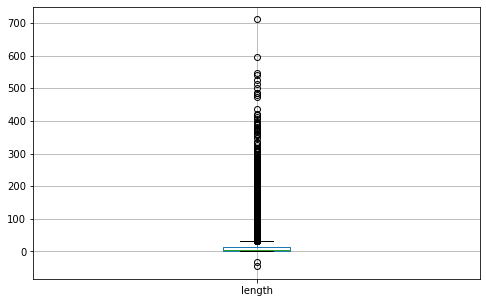

In [22]:
visits.boxplot(['length'],  figsize=(8,5))

In [23]:
visits['length'][visits['length']<0]

4181     -32
177972   -46
Name: length, dtype: int32

In [24]:
visits['length'][visits['length']==0]

2         0
4         0
28        0
32        0
54        0
         ..
359395    0
359396    0
359397    0
359398    0
359399    0
Name: length, Length: 36662, dtype: int32

The negatives values are not real, we can discard them. The zero duration does not mean an eror, but the data is measured by minutes, so we can consider that every action with less than 1 minute is included in the zero minutes duration group.
The big values are reflecting some special behaviors from users, so we will leave them like this so we can analyse it later (if necessary)

In [25]:
#eliminating the negative values
visits = visits[visits['length']>=0]
#checking if the change was made
visits['length'][visits['length']<0]

Series([], Name: length, dtype: int32)

In [26]:
duration = visits.groupby(visits['day'])['length'].mean().round().reset_index()
duration.columns=['day', 'length_avg']
duration

day  length_avg
0   2017-06-01        11.0
1   2017-06-02        10.0
2   2017-06-03        10.0
3   2017-06-04         9.0
4   2017-06-05        10.0
..         ...         ...
359 2018-05-27         9.0
360 2018-05-28        11.0
361 2018-05-29        10.0
362 2018-05-30        11.0
363 2018-05-31        12.0

[364 rows x 2 columns]

In [27]:
fig = px.line(duration,x="day", y="length_avg",title='Average Duration per day (minutes)')
#adding reference line
fig.add_hline(y=duration['length_avg'].mean(),line_dash="dash", line_color="grey")
fig.update_layout(
    showlegend=True,
    plot_bgcolor="#cccfff",
    margin=dict(t=50,l=10,b=10,r=10)
)
fig.show()

array([[<AxesSubplot:title={'center':'length_avg'}>]], dtype=object)

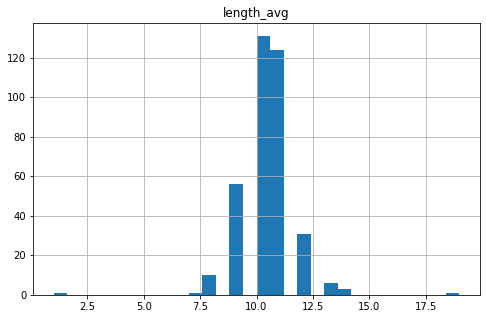

In [28]:
duration.hist('length_avg', bins = 30 ,figsize=(8,5))

<a class="anchor" id="step2d"></a>
<div style="background-color:#cccfff">

###     4. How often do users come back?
    
</div>


In [29]:
#Finding the first visit for every user
#grouping by first visit
first_visit_date = visits.groupby(['uid'])['start ts'].min()
first_visit_date.name = 'first_visit'
#joining with the original file
visits =  visits.merge(first_visit_date, how = 'inner', on=['uid'])
visits.head(10)

device              end ts  source id            start ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
5  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
6  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
7  desktop 2017-10-27 16:02:00          3 2017-10-27 15:20:00   
8  desktop 2017-09-04 17:56:00          4 2017-09-04 17:37:00   
9  desktop 2017-10-28 00:04:00          3 2017-10-27 23:56:00   

                    uid        day       week      month  length  \
0  16879256277535980062 2017-12-20 2017-12-14 2017-12-01      18   
1    104060357244891740 2018-02-19 2018-02-15 2018-02-01      28   
2   7459035603376831527 2017-07-01 2017-06-29 2017-07-01       0   
3  16174680259334210214 2018-05-20 2018-05-17 2018-05-01      24   
4  16174680259334210214 2018-03-09 2018-03-08 2018-03-01      28   
5   9969694820036681168 2017-12-27 2017-12-21 2017-12-01       0   
6  16007536194108375387 2017-09-03 2017-08-31 2017-09-01       1   
7  16007536194108375387 2017-10-27 2017-10-26 2017-10-01      42   
8  16007536194108375387 2017-09-04 2017-08-31 2017-09-01      19   
9  16007536194108375387 2017-10-27 2017-10-26 2017-10-01       8   

          first_visit  
0 2017-12-20 17:20:00  
1 2018-02-19 16:53:00  
2 2017-07-01 01:54:00  
3 2018-03-09 20:05:00  
4 2018-03-09 20:05:00  
5 2017-12-27 14:06:00  
6 2017-09-03 21:35:00  
7 2017-09-03 21:35:00  
8 2017-09-03 21:35:00  
9 2017-09-03 21:35:00

In [30]:
# Checking the daily number of visits by User
dau2 = visits.groupby(['day','uid'])['start ts'].count().reset_index()

dau2.columns=['day', 'uid', 'total_visits']
#dau2['sessions_per_user']=dau2['start ts']/dau2['uid'].count()
dau2


#.agg({'user_id':'nunique','price':'sum'})

day                   uid  total_visits
0      2017-06-01     32197920403662046             1
1      2017-06-01    184148767273119549             2
2      2017-06-01    254239507810036143             1
3      2017-06-01    258099436367309303             1
4      2017-06-01    300776506671194537             1
...           ...                   ...           ...
330504 2018-05-31  18413292963150477112             1
330505 2018-05-31  18428173890345346536             1
330506 2018-05-31  18428797902626915731             1
330507 2018-05-31  18438521692156628706             1
330508 2018-05-31  18438729003678071174             1

[330509 rows x 3 columns]

In [31]:
# Creating monthly cohorts to check how often users come back

visits['cohort'] = visits['first_visit'].astype('datetime64[M]')
visits['life'] = ((pd.to_datetime(visits['day']) - pd.to_datetime(visits['first_visit'])) / np.timedelta64(1,'M')).round().astype('int')
visits.sort_values('day').head()

device              end ts  source id            start ts  \
76792     touch 2017-06-01 10:53:00          2 2017-06-01 10:43:00   
283878  desktop 2017-06-01 09:04:00          3 2017-06-01 09:03:00   
110681  desktop 2017-06-01 20:09:00          2 2017-06-01 20:09:00   
110682  desktop 2017-06-01 19:11:00          5 2017-06-01 19:07:00   
196462    touch 2017-06-01 19:03:00          3 2017-06-01 18:59:00   

                         uid        day       week      month  length  \
76792   18205406989812883854 2017-06-01 2017-06-01 2017-06-01      10   
283878   9606240277403499100 2017-06-01 2017-06-01 2017-06-01       1   
110681  14459146286247640296 2017-06-01 2017-06-01 2017-06-01       0   
110682  14459146286247640296 2017-06-01 2017-06-01 2017-06-01       4   
196462   3621788520712541685 2017-06-01 2017-06-01 2017-06-01       4   

               first_visit     cohort  life  
76792  2017-06-01 10:43:00 2017-06-01     0  
283878 2017-06-01 09:03:00 2017-06-01     0  
110681 2017-06-01 19:07:00 2017-06-01     0  
110682 2017-06-01 19:07:00 2017-06-01     0  
196462 2017-06-01 18:59:00 2017-06-01     0

In [32]:
activity = visits.pivot_table(index='cohort',
                  columns='life',
                  values='uid',
                  aggfunc='nunique')
activity

life             0       1       2       3      4      5      6      7   \
cohort                                                                    
2017-06-01  13259.0   976.0   704.0   814.0  915.0  886.0  850.0  732.0   
2017-07-01  13140.0   743.0   677.0   712.0  741.0  641.0  589.0  638.0   
2017-08-01  10181.0   710.0   621.0   604.0  515.0  430.0  416.0  343.0   
2017-09-01  16704.0  1289.0  1096.0   827.0  668.0  660.0  556.0  424.0   
2017-10-01  25977.0  1912.0  1346.0  1001.0  948.0  805.0  546.0  460.0   
2017-11-01  27248.0  1888.0  1246.0  1060.0  860.0  646.0  502.0   66.0   
2017-12-01  25268.0  1301.0  1010.0   737.0  546.0  402.0   67.0    NaN   
2018-01-01  22624.0  1212.0   809.0   580.0  387.0   37.0    NaN    NaN   
2018-02-01  22197.0  1061.0   581.0   402.0   42.0    NaN    NaN    NaN   
2018-03-01  20589.0   854.0   503.0    75.0    NaN    NaN    NaN    NaN   
2018-04-01  15709.0   624.0    62.0     NaN    NaN    NaN    NaN    NaN   
2018-05-01  15273.0    95.0     NaN     NaN    NaN    NaN    NaN    NaN   

life           8      9      10     11     12  
cohort                                         
2017-06-01  749.0  658.0  561.0  521.0  167.0  
2017-07-01  492.0  376.0  320.0   65.0    NaN  
2017-08-01  296.0  233.0   29.0    NaN    NaN  
2017-09-01  333.0   39.0    NaN    NaN    NaN  
2017-10-01   81.0    NaN    NaN    NaN    NaN  
2017-11-01    NaN    NaN    NaN    NaN    NaN  
2017-12-01    NaN    NaN    NaN    NaN    NaN  
2018-01-01    NaN    NaN    NaN    NaN    NaN  
2018-02-01    NaN    NaN    NaN    NaN    NaN  
2018-03-01    NaN    NaN    NaN    NaN    NaN  
2018-04-01    NaN    NaN    NaN    NaN    NaN  
2018-05-01    NaN    NaN    NaN    NaN    NaN

In [33]:
activity[0]


cohort
2017-06-01    13259.0
2017-07-01    13140.0
2017-08-01    10181.0
2017-09-01    16704.0
2017-10-01    25977.0
2017-11-01    27248.0
2017-12-01    25268.0
2018-01-01    22624.0
2018-02-01    22197.0
2018-03-01    20589.0
2018-04-01    15709.0
2018-05-01    15273.0
Name: 0, dtype: float64

In [34]:
retention=activity.iloc[:,0:].div(activity[0], axis=0)
retention

life         0         1         2         3         4         5         6   \
cohort                                                                        
2017-06-01  1.0  0.073610  0.053096  0.061392  0.069010  0.066823  0.064107   
2017-07-01  1.0  0.056545  0.051522  0.054186  0.056393  0.048782  0.044825   
2017-08-01  1.0  0.069738  0.060996  0.059326  0.050584  0.042236  0.040860   
2017-09-01  1.0  0.077167  0.065613  0.049509  0.039990  0.039511  0.033285   
2017-10-01  1.0  0.073604  0.051815  0.038534  0.036494  0.030989  0.021019   
2017-11-01  1.0  0.069289  0.045728  0.038902  0.031562  0.023708  0.018423   
2017-12-01  1.0  0.051488  0.039972  0.029167  0.021608  0.015909  0.002652   
2018-01-01  1.0  0.053571  0.035758  0.025636  0.017106  0.001635       NaN   
2018-02-01  1.0  0.047799  0.026175  0.018111  0.001892       NaN       NaN   
2018-03-01  1.0  0.041478  0.024431  0.003643       NaN       NaN       NaN   
2018-04-01  1.0  0.039722  0.003947       NaN       NaN       NaN       NaN   
2018-05-01  1.0  0.006220       NaN       NaN       NaN       NaN       NaN   

life              7         8         9         10        11        12  
cohort                                                                  
2017-06-01  0.055208  0.056490  0.049627  0.042311  0.039294  0.012595  
2017-07-01  0.048554  0.037443  0.028615  0.024353  0.004947       NaN  
2017-08-01  0.033690  0.029074  0.022886  0.002848       NaN       NaN  
2017-09-01  0.025383  0.019935  0.002335       NaN       NaN       NaN  
2017-10-01  0.017708  0.003118       NaN       NaN       NaN       NaN  
2017-11-01  0.002422       NaN       NaN       NaN       NaN       NaN  
2017-12-01       NaN       NaN       NaN       NaN       NaN       NaN  
2018-01-01       NaN       NaN       NaN       NaN       NaN       NaN  
2018-02-01       NaN       NaN       NaN       NaN       NaN       NaN  
2018-03-01       NaN       NaN       NaN       NaN       NaN       NaN  
2018-04-01       NaN       NaN       NaN       NaN       NaN       NaN  
2018-05-01       NaN       NaN       NaN       NaN       NaN       NaN

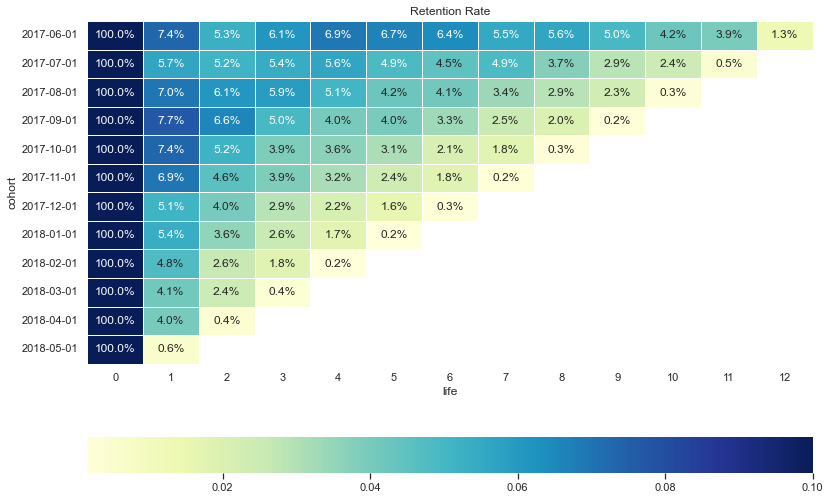

In [35]:
# Creating the visualization
retention.index=retention.index.astype(str)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention,cmap="YlGnBu", annot=True, fmt='.1%', linewidths=1, linecolor='white',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Retention Rate')
plt.show()

The cohort from June 2017 have the higher general retention during the period registering proportionally more visits than the others cohorts in a higher value of 7.4% and lower of 3.9% of repeating visits.
The September 2017' cohort start with the higher retention for the first two months, but from then, registered less visits gradually untill reach 2.0% of returning visitors on the 8th month

<a class="anchor" id="step3"></a>
       
# Sales:

    

<a class="anchor" id="step3a"></a>
<div style="background-color:#FFF68D">
       
##  1. When do people start buying?
</div>


In [36]:
orders

buy ts  revenue                   uid
0     2017-06-01 00:10:00    17.00  10329302124590727494
1     2017-06-01 00:25:00     0.55  11627257723692907447
2     2017-06-01 00:27:00     0.37  17903680561304213844
3     2017-06-01 00:29:00     0.55  16109239769442553005
4     2017-06-01 07:58:00     0.37  14200605875248379450
...                   ...      ...                   ...
50410 2018-05-31 23:50:00     4.64  12296626599487328624
50411 2018-05-31 23:50:00     5.80  11369640365507475976
50412 2018-05-31 23:54:00     0.30   1786462140797698849
50413 2018-05-31 23:56:00     3.67   3993697860786194247
50414 2018-06-01 00:02:00     3.42     83872787173869366

[50415 rows x 3 columns]

In [37]:
#first order
first_order = orders.groupby(['uid'])['buy ts'].min().reset_index()
first_order.columns = ['uid','first_buy']

first_order


uid           first_buy
0           313578113262317 2018-01-03 21:51:00
1          1575281904278712 2017-06-03 10:13:00
2          2429014661409475 2017-10-11 18:33:00
3          2464366381792757 2018-01-28 15:54:00
4          2551852515556206 2017-11-24 10:14:00
...                     ...                 ...
36518  18445147675727495770 2017-11-24 09:03:00
36519  18445407535914413204 2017-09-22 23:55:00
36520  18445601152732270159 2018-03-26 22:54:00
36521  18446156210226471712 2018-02-18 19:34:00
36522  18446167067214817906 2017-10-17 10:16:00

[36523 rows x 2 columns]

In [38]:
#first visit is in first_visit_date table used before
conversion_time = first_order.merge(first_visit_date, on='uid')
conversion_time

uid           first_buy         first_visit
0           313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00
1          1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00
2          2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00
3          2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00
4          2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00
...                     ...                 ...                 ...
36518  18445147675727495770 2017-11-24 09:03:00 2017-08-20 13:30:00
36519  18445407535914413204 2017-09-22 23:55:00 2017-09-22 23:48:00
36520  18445601152732270159 2018-03-26 22:54:00 2017-08-07 11:51:00
36521  18446156210226471712 2018-02-18 19:34:00 2017-11-07 10:01:00
36522  18446167067214817906 2017-10-17 10:16:00 2017-10-17 10:05:00

[36523 rows x 3 columns]

In [39]:
conversion_time['conversion']=((pd.to_datetime(conversion_time['first_buy'])-pd.to_datetime(conversion_time['first_visit']))/np.timedelta64(1,'D')).astype('int')
conversion_time

uid           first_buy         first_visit  \
0           313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00   
1          1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00   
2          2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00   
3          2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00   
4          2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00   
...                     ...                 ...                 ...   
36518  18445147675727495770 2017-11-24 09:03:00 2017-08-20 13:30:00   
36519  18445407535914413204 2017-09-22 23:55:00 2017-09-22 23:48:00   
36520  18445601152732270159 2018-03-26 22:54:00 2017-08-07 11:51:00   
36521  18446156210226471712 2018-02-18 19:34:00 2017-11-07 10:01:00   
36522  18446167067214817906 2017-10-17 10:16:00 2017-10-17 10:05:00   

       conversion  
0             106  
1               0  
2               0  
3               0  
4               0  
...           ...  
36518          95  
36519           0  
36520         231  
36521         103  
36522           0  

[36523 rows x 4 columns]

In [40]:
conversion_time['conversion'].describe()

count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion, dtype: float64

array([[<AxesSubplot:title={'center':'conversion'}>]], dtype=object)

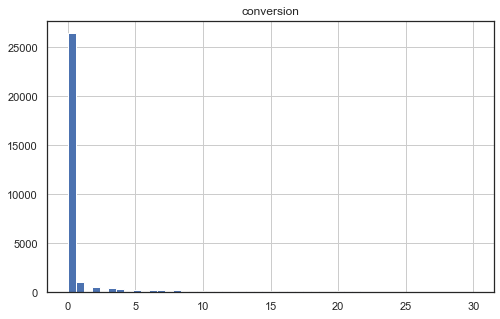

In [41]:
conversion_time.hist('conversion', bins = 50 ,figsize=(8,5), range = (0,30))

In [42]:
conversion_time[conversion_time['conversion']>90].sort_values('conversion')

uid           first_buy         first_visit  \
19269   9750688464326124118 2018-03-04 22:03:00 2017-12-03 21:45:00   
31997  16151246343196576811 2018-03-02 13:01:00 2017-11-30 15:16:00   
1603     808233058602089098 2017-10-16 20:56:00 2017-07-17 13:33:00   
3453    1754166337570019002 2017-12-07 11:11:00 2017-09-07 10:05:00   
15060   7563483982753682391 2018-02-20 18:43:00 2017-11-21 13:10:00   
...                     ...                 ...                 ...   
8016    4044684955900748187 2018-05-30 13:46:00 2017-06-07 08:23:00   
24282  12282157960125853781 2018-05-29 21:51:00 2017-06-06 14:20:00   
12143   6079087450327100134 2018-05-28 19:15:00 2017-06-05 18:05:00   
31247  15758490655816676033 2018-05-30 11:34:00 2017-06-01 18:47:00   
13783   6916757527179896321 2018-05-31 17:35:00 2017-06-02 10:31:00   

       conversion  
19269          91  
31997          91  
1603           91  
3453           91  
15060          91  
...           ...  
8016          357  
24282         357  
12143         357  
31247         362  
13783         363  

[2628 rows x 4 columns]

In [43]:
conversion_rate = orders['uid'].nunique()/visits['uid'].nunique()*100
conversion_rate

16.006994815246596

More than 50% of the purchases were made on the same day of the first visit. From 50 to 75% until 2 days after the first visit, showing a great value fr conversion on those users that order something on the site.
Also there are some 2600 users that made their first buy only after more than 90 days after the registration.
From the total of visits to the site, 16% made a purchase during the period.

<a class="anchor" id="step3b"></a>
<div style="background-color:#FFF68D">
       
##  2.  How many orders do they make during a given period of time?
</div>




In [44]:
orders = orders.merge(first_order, on='uid')
orders


buy ts  revenue                   uid           first_buy
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00
...                   ...      ...                   ...                 ...
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31 23:50:00
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31 23:50:00
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31 23:54:00
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00

[50415 rows x 4 columns]

In [45]:
# Creating monthly cohorts to check how often users come back

orders['cohort'] = orders['first_buy'].astype('datetime64[M]')
orders['time'] = ((pd.to_datetime(orders['buy ts']) - pd.to_datetime(orders['first_buy'])) / np.timedelta64(1,'M')).round().astype('int')
orders['day']=orders['buy ts'].astype('datetime64[D]')
orders['week']=orders['buy ts'].astype('datetime64[W]')
orders['month']=orders['buy ts'].astype('datetime64[M]')
orders.sample(10).sort_values('day')

buy ts  revenue                   uid           first_buy  \
2677  2017-06-09 12:58:00     2.08  17719152684044931457 2017-06-09 12:58:00   
4813  2017-07-04 08:37:00     0.58  10630894899235959850 2017-07-04 08:37:00   
8311  2017-08-19 13:40:00     3.67   3977111777530213566 2017-08-19 13:40:00   
13856 2017-10-03 11:59:00     2.75   8625857619304139756 2017-10-03 11:59:00   
21927 2017-11-17 07:50:00    16.50   1485857321929034304 2017-11-17 07:50:00   
34028 2018-01-22 23:27:00     2.44  11485431611727667198 2018-01-22 23:27:00   
40774 2018-03-05 22:46:00     2.44  12195045259958614846 2018-03-05 22:46:00   
236   2018-04-06 11:28:00     4.89   3644482766749211722 2017-06-01 09:22:00   
47624 2018-05-16 18:34:00     1.22    268208395083179259 2018-05-07 20:34:00   
49114 2018-05-31 18:22:00     0.30   1429719929952592122 2018-05-23 23:11:00   

          cohort  time        day       week      month  
2677  2017-06-01     0 2017-06-09 2017-06-08 2017-06-01  
4813  2017-07-01     0 2017-07-04 2017-06-29 2017-07-01  
8311  2017-08-01     0 2017-08-19 2017-08-17 2017-08-01  
13856 2017-10-01     0 2017-10-03 2017-09-28 2017-10-01  
21927 2017-11-01     0 2017-11-17 2017-11-16 2017-11-01  
34028 2018-01-01     0 2018-01-22 2018-01-18 2018-01-01  
40774 2018-03-01     0 2018-03-05 2018-03-01 2018-03-01  
236   2017-06-01    10 2018-04-06 2018-04-05 2018-04-01  
47624 2018-05-01     0 2018-05-16 2018-05-10 2018-05-01  
49114 2018-05-01     0 2018-05-31 2018-05-31 2018-05-01

In [46]:
# Calculating Total orders by day 
order_day = orders.groupby('day')['uid'].count().reset_index()
order_day.columns = ['day','daily_buy']
order_day

day  daily_buy
0   2017-06-01         96
1   2017-06-02        111
2   2017-06-03         67
3   2017-06-04         66
4   2017-06-05        161
..         ...        ...
359 2018-05-28        188
360 2018-05-29        189
361 2018-05-30        208
362 2018-05-31        610
363 2018-06-01          1

[364 rows x 2 columns]

In [47]:
fig = px.line(order_day,x="day", y='daily_buy',title='Daily Orders')
#adding reference line
fig.add_hline(y=order_day['daily_buy'].mean(),line_dash="dash", line_color="grey", annotation_text="Average Orders",
              annotation_position="top left")
fig.update_layout(
    showlegend=True,
    plot_bgcolor="#FFF68D",
    margin=dict(t=50,l=10,b=10,r=10)
)
fig.show()

Here we can also see that the peak of orders was in the Black Friday 2017, reaching more than 800 order in a single day, when the average for all period was around 120 orders a day. The best purchase season was from the end of September 2017 to the end of March 2018. 

In [48]:
# Calculating Total orders by week 
order_week = orders.groupby('week')['uid'].count().reset_index()
order_week.columns = ['week','weekly_buy']
order_week.head()

week  weekly_buy
0 2017-06-01         896
1 2017-06-08         525
2 2017-06-15         341
3 2017-06-22         441
4 2017-06-29         461

In [49]:
fig = px.line(order_week,x="week", y='weekly_buy',title='Weekly Orders')
#adding reference line
fig.add_hline(y=order_week['weekly_buy'].mean(),line_dash="dash", line_color="grey", annotation_text="Average Orders",
              annotation_position="top left")
fig.update_layout(
    showlegend=True,
    plot_bgcolor="#FFF68D",
    margin=dict(t=50,l=10,b=10,r=10)
)
fig.show()

In [50]:
# Calculating Total orders by month 
order_month = orders.groupby('month')['uid'].count().reset_index()
order_month.columns = ['month','monthly_buy']
order_month

month  monthly_buy
0  2017-06-01         2354
1  2017-07-01         2363
2  2017-08-01         1807
3  2017-09-01         3387
4  2017-10-01         5679
5  2017-11-01         5659
6  2017-12-01         6218
7  2018-01-01         4721
8  2018-02-01         5281
9  2018-03-01         5326
10 2018-04-01         3273
11 2018-05-01         4346
12 2018-06-01            1

In [51]:
fig = px.line(order_month,x="month", y='monthly_buy',title='Monthly Orders')
#adding reference line
fig.add_hline(y=order_month['monthly_buy'].mean(),line_dash="dash", line_color="grey", annotation_text="Average Orders",
              annotation_position="top left")
fig.update_layout(
    showlegend=True,
    plot_bgcolor="#FFF68D",
    margin=dict(t=50,l=10,b=10,r=10)
)
fig.show()

In [52]:
repeat_buy = (orders.groupby('uid')['buy ts'].count()).reset_index()
repeat_buy.columns = ['uid',"n_orders"]
repeat_buy

uid  n_orders
0           313578113262317         1
1          1575281904278712         2
2          2429014661409475         1
3          2464366381792757         1
4          2551852515556206         2
...                     ...       ...
36518  18445147675727495770         1
36519  18445407535914413204         3
36520  18445601152732270159         1
36521  18446156210226471712         1
36522  18446167067214817906         1

[36523 rows x 2 columns]

In [53]:
repeat_buy.n_orders.describe()

count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: n_orders, dtype: float64

In [54]:
#We have to find the number of members in each cohort
cohorts = orders[['uid','cohort']]
cohorts

uid     cohort
0      10329302124590727494 2017-06-01
1      11627257723692907447 2017-06-01
2      17903680561304213844 2017-06-01
3      16109239769442553005 2017-06-01
4      14200605875248379450 2017-06-01
...                     ...        ...
50410  12296626599487328624 2018-05-01
50411  11369640365507475976 2018-05-01
50412   1786462140797698849 2018-05-01
50413   3993697860786194247 2018-05-01
50414     83872787173869366 2018-06-01

[50415 rows x 2 columns]

In [55]:

cohort_sizes = cohorts.groupby('cohort').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['cohort', 'n_buyers']
cohort_sizes.head()

cohort  n_buyers
0 2017-06-01      2023
1 2017-07-01      1923
2 2017-08-01      1370
3 2017-09-01      2581
4 2017-10-01      4340

In [56]:
#calculating number of purchases for cohort and month
cohort_buy =orders.groupby(['cohort','month'])['revenue'].count().reset_index()
cohort_buy.columns=['cohort','month','orders']
#merge cohort with cohort size
cohort_buy=cohort_buy.merge(cohort_sizes,on=['cohort'])
cohort_buy['time'] = ((pd.to_datetime(cohort_buy['month']) - pd.to_datetime(cohort_buy['cohort'])) / np.timedelta64(1,'M')).round()
cohort_buy['buyer_return_rate']=cohort_buy['orders']/cohort_buy['n_buyers']
cohort_buy.head()

cohort      month  orders  n_buyers  time  buyer_return_rate
0 2017-06-01 2017-06-01    2354      2023   0.0           1.163618
1 2017-06-01 2017-07-01     177      2023   1.0           0.087494
2 2017-06-01 2017-08-01     174      2023   2.0           0.086011
3 2017-06-01 2017-09-01     226      2023   3.0           0.111715
4 2017-06-01 2017-10-01     292      2023   4.0           0.144340

In [57]:
report_buy =cohort_buy.pivot_table(
    index='cohort', 
    columns='time', 
    values='buyer_return_rate', 
    aggfunc='sum'
).cumsum(axis=1)

report_buy.round(2).fillna('')

time        0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
cohort                                                                         
2017-06-01  1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   2.1  2.15   
2017-07-01  1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47  1.49  1.51   
2017-08-01  1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   1.6         
2017-09-01  1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5               
2017-10-01  1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38                     
2017-11-01  1.18  1.28  1.32  1.37  1.41  1.42  1.45                           
2017-12-01  1.15  1.21  1.26   1.3  1.32  1.34                                 
2018-01-01  1.12  1.19  1.24  1.25  1.28                                       
2018-02-01  1.12  1.18  1.21  1.22                                             
2018-03-01  1.17  1.22  1.27                                                   
2018-04-01  1.10  1.18                                                         
2018-05-01  1.09                                                               
2018-06-01  1.00                                                               

time        11.0  
cohort            
2017-06-01  2.19  
2017-07-01        
2017-08-01        
2017-09-01        
2017-10-01        
2017-11-01        
2017-12-01        
2018-01-01        
2018-02-01        
2018-03-01        
2018-04-01        
2018-05-01        
2018-06-01

In [58]:
orders_cohort = orders.pivot_table(index='cohort',
                  columns='time',
                  values= 'buy ts',
                  aggfunc='count').cumsum(axis=1).fillna("")
orders_cohort

time            0       1       2       3       4       5       6       7   \
cohort                                                                       
2017-06-01  2355.0  2502.0  2654.0  2890.0  3168.0  3372.0  3648.0  3845.0   
2017-07-01  2190.0  2282.0  2395.0  2500.0  2572.0  2639.0  2715.0  2775.0   
2017-08-01  1562.0  1660.0  1758.0  1846.0  1912.0  1972.0  2044.0  2102.0   
2017-09-01  2961.0  3157.0  3320.0  3468.0  3548.0  3660.0  3755.0  3814.0   
2017-10-01  4982.0  5256.0  5438.0  5567.0  5692.0  5786.0  5874.0  5968.0   
2017-11-01  4951.0  5210.0  5430.0  5610.0  5739.0  5803.0  5880.0  5900.0   
2017-12-01  5062.0  5304.0  5518.0  5699.0  5780.0  5878.0  5894.0           
2018-01-01  3807.0  4018.0  4167.0  4242.0  4301.0  4308.0                   
2018-02-01  4102.0  4324.0  4407.0  4464.0  4470.0                           
2018-03-01  4130.0  4326.0  4468.0  4484.0                                   
2018-04-01  2511.0  2677.0  2690.0                                           
2018-05-01  3220.0  3249.0                                                   
2018-06-01     1.0                                                           

time            8       9       10      11      12  
cohort                                              
2017-06-01  4056.0  4230.0  4340.0  4402.0  4438.0  
2017-07-01  2826.0  2853.0  2897.0  2910.0          
2017-08-01  2154.0  2188.0                          
2017-09-01  3869.0  3878.0                          
2017-10-01  6005.0                                  
2017-11-01                                          
2017-12-01                                          
2018-01-01                                          
2018-02-01                                          
2018-03-01                                          
2018-04-01                                          
2018-05-01                                          
2018-06-01

The cohorts with the higher numbers of orders in its start is from December, October and November 2017

From the almost 45600 purchases during this period, there are  19374 orders made  from users that bought more than once in the platform more than 42% of all purchases. In total there is 6292 buyers that are responsible for those orders.

<a class="anchor" id="step3c"></a>
<div style="background-color:#FFF68D">
       
##  3. What is the average purchase size?
</div>


count    45991.000000
mean         5.480577
std         22.922826
min          0.000000
25%          1.400000
50%          2.820000
75%          5.500000
max       2633.280000
Name: revenue, dtype: float64

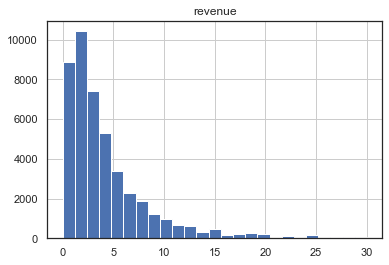

In [59]:
revenue_avg=orders.groupby(['buy ts'])['revenue'].sum().reset_index()
revenue_avg.hist('revenue', bins=25, range=(0,30))
revenue_avg.revenue.describe()

In [60]:
#Checking to the order of 2633,00 to see if it was in the original orders data
revenue_avg[revenue_avg['revenue']== revenue_avg['revenue'].max()]

buy ts  revenue
21301 2017-12-10 20:17:00  2633.28

In [61]:
orders[orders['buy ts'] == '2017-12-10 20:17:00' ]
#So the value is in the table maybe a big purchase from one customer.

buy ts  revenue                  uid           first_buy  \
11732 2017-12-10 20:17:00  2633.28  5539673724080479777 2017-09-20 19:55:00   

          cohort  time        day       week      month  
11732 2017-09-01     3 2017-12-10 2017-12-07 2017-12-01

In [62]:
#annalyzing the purchases by cohort

avg_cohort=orders.groupby(['cohort','buy ts'])['revenue'].mean().reset_index()
avg_cohort['time'] = ((pd.to_datetime(avg_cohort['buy ts'] )- pd.to_datetime (avg_cohort['cohort'])) / np.timedelta64(1,'M')).round()

avg_cohort.head()

cohort              buy ts  revenue  time
0 2017-06-01 2017-06-01 00:10:00    17.00   0.0
1 2017-06-01 2017-06-01 00:25:00     0.55   0.0
2 2017-06-01 2017-06-01 00:27:00     0.37   0.0
3 2017-06-01 2017-06-01 00:29:00     0.55   0.0
4 2017-06-01 2017-06-01 07:58:00     0.37   0.0

In [63]:
avg_report=avg_cohort.pivot_table(
    index='cohort', 
    columns='time', 
    values='revenue', 
    aggfunc='mean'
).cumsum(axis=1).round(2)

avg_report

time        0.0    1.0    2.0    3.0    4.0     5.0     6.0     7.0     8.0   \
cohort                                                                         
2017-06-01  3.58   8.63  12.83  20.25  28.37   34.15   41.82   47.72   54.24   
2017-07-01  4.87  10.45  16.81  27.86  32.21   36.48   40.01   44.34   52.29   
2017-08-01  4.39   9.21  16.48  23.26  30.80   37.11   43.07   50.58   57.11   
2017-09-01  4.24  10.05  21.54  67.22  97.71  115.42  130.79  141.12  151.68   
2017-10-01  3.90   8.99  15.98  21.04  26.84   31.79   36.54   40.96   44.52   
2017-11-01  4.49   8.73  12.85  18.00  24.59   27.91   32.19   36.63     NaN   
2017-12-01  3.65   8.18  15.61  36.46  66.61   94.57   97.24     NaN     NaN   
2018-01-01  3.58   7.42  11.98  19.97  24.55   27.37     NaN     NaN     NaN   
2018-02-01  3.77   7.57  10.98  14.48  18.52     NaN     NaN     NaN     NaN   
2018-03-01  4.35   8.37  13.62  20.96    NaN     NaN     NaN     NaN     NaN   
2018-04-01  4.26   8.65  14.47    NaN    NaN     NaN     NaN     NaN     NaN   
2018-05-01  3.99   8.14    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
2018-06-01  3.42    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   

time          9.0    10.0   11.0   12.0  
cohort                                   
2017-06-01   61.50  66.25  81.54  86.47  
2017-07-01   55.09  66.26  71.69    NaN  
2017-08-01   64.44  72.10    NaN    NaN  
2017-09-01  159.19    NaN    NaN    NaN  
2017-10-01     NaN    NaN    NaN    NaN  
2017-11-01     NaN    NaN    NaN    NaN  
2017-12-01     NaN    NaN    NaN    NaN  
2018-01-01     NaN    NaN    NaN    NaN  
2018-02-01     NaN    NaN    NaN    NaN  
2018-03-01     NaN    NaN    NaN    NaN  
2018-04-01     NaN    NaN    NaN    NaN  
2018-05-01     NaN    NaN    NaN    NaN  
2018-06-01     NaN    NaN    NaN    NaN

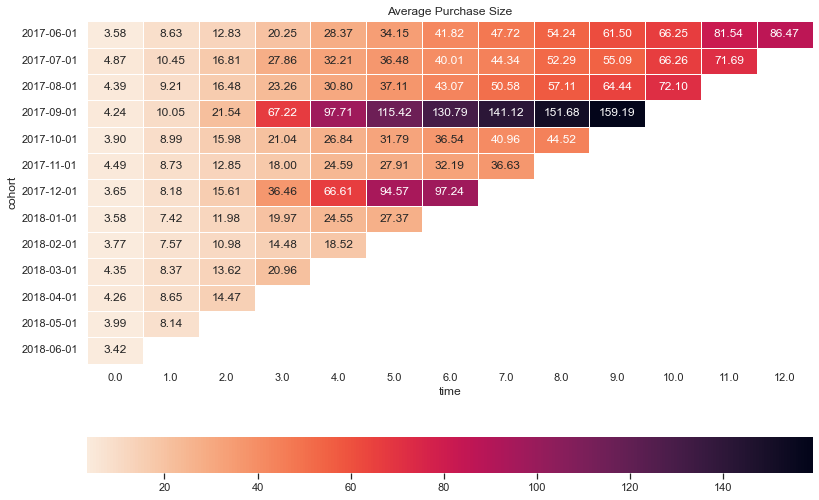

In [64]:
#creating the visualization
avg_report.index=avg_report.index.astype(str)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(avg_report, annot=True, cmap="rocket_r", fmt='.2f', linewidths=1, linecolor='white',  cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Average Purchase Size')
plt.show()

In [65]:
#Question for the reviewer:
#Why this is not right? And Why is different from the above?
purchase_size = orders.pivot_table(index='cohort',
                  columns='time',
                  values='revenue',
                  aggfunc='mean').round(2).fillna(" ")

purchase_size

time          0      1      2      3      4      5     6      7     8      9   \
cohort                                                                          
2017-06-01  4.08   5.33   5.07   7.36   7.96    7.1  6.56   5.65  6.92   7.34   
2017-07-01  5.29   6.76   10.1   6.63   4.92   3.47  3.24   5.04  6.77   9.98   
2017-08-01  4.67   7.49   5.98    8.1   6.87   6.43  5.92   6.93  7.87   5.97   
2017-09-01  5.02  12.86  15.53  61.49  19.57  16.76  8.87  14.79  6.88  15.15   
2017-10-01  4.41   7.33   5.37   4.89   5.82   4.48  3.88   5.05  1.95          
2017-11-01  4.32   5.03   4.93   5.72   4.84   3.99  4.25   5.48                
2017-12-01  4.09   4.76  18.88  26.12  16.64  14.94  3.52                       
2018-01-01  3.68   5.01   7.11   4.74   2.97   2.51                             
2018-02-01  3.70   4.78   3.28   4.11   3.66                                    
2018-03-01  4.14   5.78   4.81  21.85                                           
2018-04-01  4.24   5.75  15.35                                                  
2018-05-01  4.30   2.74                                                         
2018-06-01  3.42                                                                

time           10    11    12  
cohort                         
2017-06-01  10.61  7.14  5.18  
2017-07-01   4.76   9.0        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01                     
2018-06-01

<a class="anchor" id="step3d"></a>
<div style="background-color:#FFF68D">
       
##  4. How much money do they bring? LTV
</div>

In [66]:
# Purchases by cohort per month
revenue_sum= orders.groupby(['cohort','month'])['revenue'].sum().reset_index()
revenue_sum.head() 

cohort      month  revenue
0 2017-06-01 2017-06-01  9557.49
1 2017-06-01 2017-07-01   981.82
2 2017-06-01 2017-08-01   885.34
3 2017-06-01 2017-09-01  1931.30
4 2017-06-01 2017-10-01  2068.58

In [67]:
#considering gross profit = revenue and using the cohort sizes
ltv_cohort = revenue_sum.merge(cohort_sizes, on='cohort')
ltv_cohort['time']=((ltv_cohort['month'] - ltv_cohort['cohort']) / np.timedelta64(1,'M')).round()
ltv_cohort['ltv']= ltv_cohort.revenue/ltv_cohort.n_buyers
ltv_cohort.head()

cohort      month  revenue  n_buyers  time       ltv
0 2017-06-01 2017-06-01  9557.49      2023   0.0  4.724414
1 2017-06-01 2017-07-01   981.82      2023   1.0  0.485329
2 2017-06-01 2017-08-01   885.34      2023   2.0  0.437637
3 2017-06-01 2017-09-01  1931.30      2023   3.0  0.954671
4 2017-06-01 2017-10-01  2068.58      2023   4.0  1.022531

In [68]:
ltv_report = ltv_cohort.pivot_table(index='cohort',
                  columns='time',
                  values='ltv',
                  aggfunc='mean').cumsum(axis=1).round(2)

ltv_report

time        0.0   1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   \
cohort                                                                          
2017-06-01  4.72  5.21  5.65   6.60   7.62   8.36   9.31   9.89  10.45  11.05   
2017-07-01  6.01  6.35  6.97   7.33   7.50   7.66   7.78   7.92   8.08   8.23   
2017-08-01  5.28  5.75  6.21   6.60   7.09   7.38   7.59   7.99   8.28   8.47   
2017-09-01  5.64  6.76  7.28  11.26  11.66  12.31  13.01  13.25  13.44    NaN   
2017-10-01  5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36    NaN    NaN   
2017-11-01  5.15  5.55  5.75   6.08   6.23   6.28   6.40    NaN    NaN    NaN   
2017-12-01  4.74  5.00  5.92   6.99   7.30   7.64    NaN    NaN    NaN    NaN   
2018-01-01  4.14  4.43  4.73   4.88   4.94    NaN    NaN    NaN    NaN    NaN   
2018-02-01  4.16  4.44  4.51   4.59    NaN    NaN    NaN    NaN    NaN    NaN   
2018-03-01  4.84  5.14  5.46    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-04-01  4.66  5.19   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-05-01  4.66   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-06-01  3.42   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

time         10.0   11.0  
cohort                    
2017-06-01  11.62  11.88  
2017-07-01   8.39    NaN  
2017-08-01    NaN    NaN  
2017-09-01    NaN    NaN  
2017-10-01    NaN    NaN  
2017-11-01    NaN    NaN  
2017-12-01    NaN    NaN  
2018-01-01    NaN    NaN  
2018-02-01    NaN    NaN  
2018-03-01    NaN    NaN  
2018-04-01    NaN    NaN  
2018-05-01    NaN    NaN  
2018-06-01    NaN    NaN

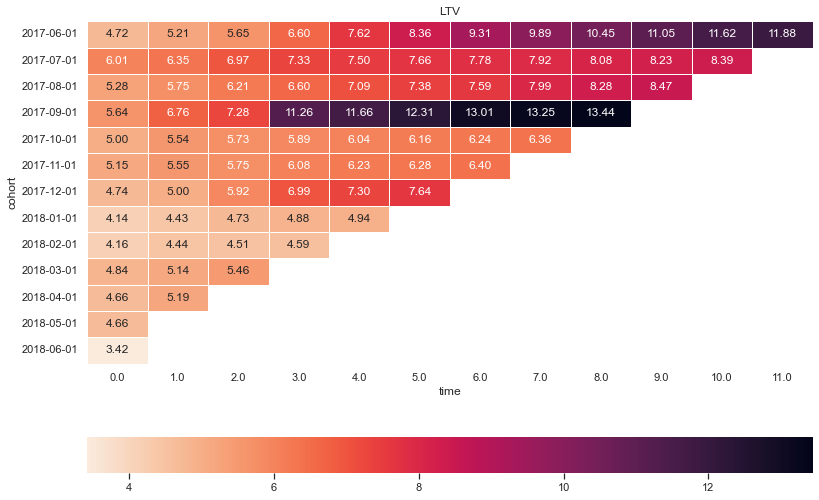

In [69]:
#creating the visualization
ltv_report.index=ltv_report.index.astype(str)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(ltv_report, annot=True, cmap="rocket_r", fmt='.2f', linewidths=1, linecolor='white',  cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'LTV')
plt.show()

<a class="anchor" id="step4"></a>
       
#  Marketing:

    

<a class="anchor" id="step4a"></a>
<div style="background-color:#DDFFCC">

## 1. How much money was spent? Overall/per source/over time

</div>


In [70]:
costs

source_id         dt  costs
0             1 2017-06-01  75.20
1             1 2017-06-02  62.25
2             1 2017-06-03  36.53
3             1 2017-06-04  55.00
4             1 2017-06-05  57.08
...         ...        ...    ...
2537         10 2018-05-27   9.92
2538         10 2018-05-28  21.26
2539         10 2018-05-29  11.32
2540         10 2018-05-30  33.15
2541         10 2018-05-31  17.60

[2542 rows x 3 columns]

In [71]:
#Total spent from all sources on the period
costs['costs'].sum()

329131.62

The total of marketing cost on the period is 329,131.62

In [72]:
#Let's check the general cost by source

cost_source = costs.groupby('source_id')['costs'].sum().reset_index()
cost_source.columns = ['source' , 'cost']
cost_source


source       cost
0       1   20833.27
1       2   42806.04
2       3  141321.63
3       4   61073.60
4       5   51757.10
5       9    5517.49
6      10    5822.49

In [73]:
cost_source.source=cost_source.source.astype(str)
fig = px.bar(cost_source, x= 'source', y='cost', color='source', title="Marketing Costs by Source")
fig.update_layout(
    
    showlegend=True,
    plot_bgcolor="#DDFFCC",
    margin=dict(t=50,l=10,b=10,r=10))

fig.show()

In [74]:
# Let's create a month column to finde the monthly marketing costs
costs['mkt_month']=costs['dt'].astype('datetime64[M]')
costs.head()

source_id         dt  costs  mkt_month
0          1 2017-06-01  75.20 2017-06-01
1          1 2017-06-02  62.25 2017-06-01
2          1 2017-06-03  36.53 2017-06-01
3          1 2017-06-04  55.00 2017-06-01
4          1 2017-06-05  57.08 2017-06-01

In [75]:
#Let's check the general cost by month
cost_month = costs.groupby('mkt_month')['costs'].sum().reset_index()
cost_month.columns = ['month' , 'cost']
cost_month


month      cost
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27

In [76]:
cost_month.month=cost_month.month.astype(str)
fig = px.line(cost_month, x="month", y="cost", title="Marketing Costs by Month")
fig.update_layout(
    showlegend=True,
    plot_bgcolor="#DDFFCC",
    margin=dict(t=50,l=10,b=10,r=10))

fig.show()

In [77]:
#Let's compare the different costs by source over time

fig = px.area(costs, x="dt", y="costs", color='source_id', title="Marketing Costs by source Over time")
fig.update_layout(
    showlegend=True,
    plot_bgcolor="#DDFFCC",
    margin=dict(t=50,l=10,b=10,r=10))
fig.show()

<a class="anchor" id="step4b"></a>
<div style="background-color:#DDFFCC">

## 2. How much did customer acquisition from each of the sources cost?

</div>



In [78]:
#Let's check the general cost by month
cost_month = costs.groupby('mkt_month')['costs'].sum().reset_index()
cost_month.columns = ['month' , 'cost']
cost_month.head()

month      cost
0 2017-06-01  18015.00
1 2017-07-01  18240.59
2 2017-08-01  14790.54
3 2017-09-01  24368.91
4 2017-10-01  36322.88

In [79]:
#To find the CAC, Let's find again the number of buyers as in the cohort_sizes used before
cohort_mkt = cohorts.groupby('cohort')['uid'].nunique().reset_index()
cohort_mkt.columns = ['month', 'buyers']
cohort_mkt.head()


month  buyers
0 2017-06-01    2023
1 2017-07-01    1923
2 2017-08-01    1370
3 2017-09-01    2581
4 2017-10-01    4340

In [80]:
cost_month=cost_month.merge(cohort_mkt,on=['month'])
cost_month['cac']= cost_month['cost'] / cost_month['buyers']
cost_month

month      cost  buyers        cac
0  2017-06-01  18015.00    2023   8.905091
1  2017-07-01  18240.59    1923   9.485486
2  2017-08-01  14790.54    1370  10.796015
3  2017-09-01  24368.91    2581   9.441654
4  2017-10-01  36322.88    4340   8.369327
5  2017-11-01  37907.88    4081   9.288870
6  2017-12-01  38315.35    4383   8.741809
7  2018-01-01  33518.52    3373   9.937302
8  2018-02-01  32723.03    3651   8.962758
9  2018-03-01  30415.27    3533   8.608907
10 2018-04-01  22289.38    2276   9.793225
11 2018-05-01  22224.27    2988   7.437841

In [81]:
fig = px.line(cost_month, x="month", y="cac", title=' general CAC')

fig.update_layout(
    showlegend=True,
    plot_bgcolor="#DDFFCC",
    margin=dict(t=50,l=10,b=10,r=10)
)

fig.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

That's right
</div>

In [82]:
#Let's see the markenting expenses from each source by month
costs_source_m = costs.groupby(['source_id','mkt_month'])['costs'].sum().reset_index()
costs_source_m.columns = ['source','month' ,'cost']
costs_source_m=costs_source_m.merge(cohort_mkt,on=['month'])
costs_source_m['cac']= costs_source_m['cost'] / costs_source_m['buyers']
costs_source_m

source      month     cost  buyers       cac
0        1 2017-06-01  1125.61    2023  0.556406
1        2 2017-06-01  2427.38    2023  1.199891
2        3 2017-06-01  7731.65    2023  3.821873
3        4 2017-06-01  3514.80    2023  1.737420
4        5 2017-06-01  2616.12    2023  1.293188
..     ...        ...      ...     ...       ...
79       3 2018-05-01  9411.42    2988  3.149739
80       4 2018-05-01  4214.21    2988  1.410378
81       5 2018-05-01  3669.56    2988  1.228099
82       9 2018-05-01   362.17    2988  0.121208
83      10 2018-05-01   409.86    2988  0.137169

[84 rows x 5 columns]

In [83]:
costs_source = costs_source_m.groupby('source')['cost'].sum().reset_index()
costs_source

source       cost
0       1   20833.27
1       2   42806.04
2       3  141321.63
3       4   61073.60
4       5   51757.10
5       9    5517.49
6      10    5822.49

In [84]:
#Let's see the different CAC per source overtime

fig = px.line(costs_source_m, x="month", y="cac", color='source')
fig.update_layout(
    title="CAC by Source",
    showlegend=True,
    plot_bgcolor="#DDFFCC",
    margin=dict(t=50,l=10,b=10,r=10))
fig.show()

<a class="anchor" id="step4c"></a>
<div style="background-color:#DDFFCC">

## 3. How worthwhile where the investments? ROI

</div>


In [85]:
# To find the ROI we have to check LTV /CAC
ltv_cohort.head()

cohort      month  revenue  n_buyers  time       ltv
0 2017-06-01 2017-06-01  9557.49      2023   0.0  4.724414
1 2017-06-01 2017-07-01   981.82      2023   1.0  0.485329
2 2017-06-01 2017-08-01   885.34      2023   2.0  0.437637
3 2017-06-01 2017-09-01  1931.30      2023   3.0  0.954671
4 2017-06-01 2017-10-01  2068.58      2023   4.0  1.022531

In [86]:
costs_source_m

source      month     cost  buyers       cac
0        1 2017-06-01  1125.61    2023  0.556406
1        2 2017-06-01  2427.38    2023  1.199891
2        3 2017-06-01  7731.65    2023  3.821873
3        4 2017-06-01  3514.80    2023  1.737420
4        5 2017-06-01  2616.12    2023  1.293188
..     ...        ...      ...     ...       ...
79       3 2018-05-01  9411.42    2988  3.149739
80       4 2018-05-01  4214.21    2988  1.410378
81       5 2018-05-01  3669.56    2988  1.228099
82       9 2018-05-01   362.17    2988  0.121208
83      10 2018-05-01   409.86    2988  0.137169

[84 rows x 5 columns]

In [87]:
roi=ltv_cohort.merge(costs_source_m[['month','source','cost','cac']], how = 'left' , on = 'month')
roi['roi']= (roi['ltv']/roi['cac']).round(2) 
roi = roi[roi['roi'].notnull()].sort_values(['month', 'time'])
roi

cohort      month  revenue  n_buyers  time       ltv  source     cost  \
0  2017-06-01 2017-06-01  9557.49      2023   0.0  4.724414     1.0  1125.61   
1  2017-06-01 2017-06-01  9557.49      2023   0.0  4.724414     2.0  2427.38   
2  2017-06-01 2017-06-01  9557.49      2023   0.0  4.724414     3.0  7731.65   
3  2017-06-01 2017-06-01  9557.49      2023   0.0  4.724414     4.0  3514.80   
4  2017-06-01 2017-06-01  9557.49      2023   0.0  4.724414     5.0  2616.12   
..        ...        ...      ...       ...   ...       ...     ...      ...   
79 2017-06-01 2018-05-01   519.62      2023  11.0  0.256856     3.0  9411.42   
80 2017-06-01 2018-05-01   519.62      2023  11.0  0.256856     4.0  4214.21   
81 2017-06-01 2018-05-01   519.62      2023  11.0  0.256856     5.0  3669.56   
82 2017-06-01 2018-05-01   519.62      2023  11.0  0.256856     9.0   362.17   
83 2017-06-01 2018-05-01   519.62      2023  11.0  0.256856    10.0   409.86   

         cac   roi  
0   0.556406  8.49  
1   1.199891  3.94  
2   3.821873  1.24  
3   1.737420  2.72  
4   1.293188  3.65  
..       ...   ...  
79  3.149739  0.08  
80  1.410378  0.18  
81  1.228099  0.21  
82  0.121208  2.12  
83  0.137169  1.87  

[546 rows x 10 columns]

In [88]:
report_roi_source = roi.groupby(['month', 'source'])['roi'].mean().round(2).reset_index()
report_roi_source

month  source   roi
0  2017-06-01     1.0  8.49
1  2017-06-01     2.0  3.94
2  2017-06-01     3.0  1.24
3  2017-06-01     4.0  2.72
4  2017-06-01     5.0  3.65
..        ...     ...   ...
79 2018-05-01     3.0  0.19
80 2018-05-01     4.0  0.41
81 2018-05-01     5.0  0.47
82 2018-05-01     9.0  4.81
83 2018-05-01    10.0  4.25

[84 rows x 3 columns]

In [89]:
#Let's see the different ROI per source overtime

fig = px.line(report_roi_source, x="month", y="roi", color='source')
fig.update_layout(
    title="ROI by Source",
    showlegend=True,
    plot_bgcolor="#DDFFCC",
    margin=dict(t=50,l=10,b=10,r=10))
fig.show()

In [90]:
report_roi_source = roi.pivot_table(
    index='source', columns='month', values='roi', aggfunc='mean'
).cumsum(axis=1).round(2) 
report_roi_source

month   2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
source                                                               
1.0           8.49       14.31       17.21       20.51       23.50   
2.0           3.94        6.62        8.14        9.80       11.23   
3.0           1.24        2.05        2.50        3.00        3.44   
4.0           2.72        4.49        5.35        6.30        7.38   
5.0           3.65        5.73        6.99        8.28        9.48   
9.0          33.51       54.15       65.25       77.19       88.53   
10.0         30.42       49.36       61.23       72.01       83.02   

month   2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
source                                                               
1.0          25.59       28.50       29.69       31.05       32.66   
2.0          12.20       13.60       14.22       14.89       15.66   
3.0           3.74        4.16        4.34        4.55        4.78   
4.0           8.32        9.21        9.66       10.18       10.69   
5.0          10.29       11.46       11.94       12.53       13.21   
9.0          96.01      106.39      111.12      116.57      122.91   
10.0         89.47      100.05      104.26      110.51      116.30   

month   2018-04-01  2018-05-01  
source                          
1.0          33.74       34.92  
2.0          16.14       16.79  
3.0           4.94        5.12  
4.0          11.02       11.43  
5.0          13.61       14.09  
9.0         126.73      131.54  
10.0        119.97      124.22

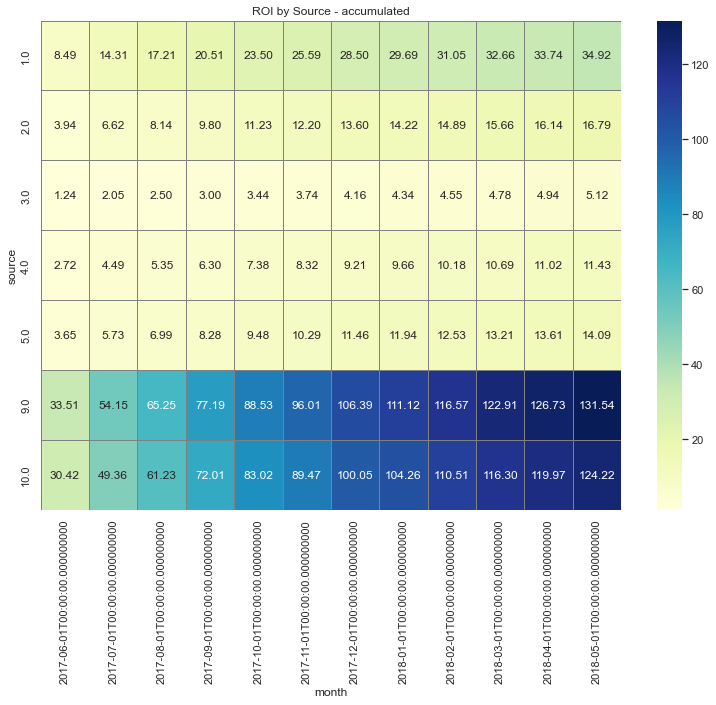

In [91]:
report_roi_source.index=report_roi_source.index.astype(str)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROI by Source ')
sns.heatmap(report_roi_source,cmap="YlGnBu", annot=True, fmt='.2f', linewidths=1, linecolor='grey',  cbar_kws= {'orientation': 'vertical'} 
            ).set(title = 'ROI by Source - accumulated')

plt.show()

The most effective sources in the period were the number 10 and 9 that registered a cumulated ROI of more than 120 each.
The worst ROI is from the source 3, that got aroun 5 points of ROI

In [92]:
report_roi = roi.pivot_table(
    index='cohort', columns='time', values='roi', aggfunc='mean'
).cumsum(axis=1).round(2) 
report_roi

time         0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0   \
cohort                                                                      
2017-06-01  12.00  13.12  14.05  16.21  18.91  20.51  22.93  24.21  25.66   
2017-07-01  13.94  14.65  16.06  17.01  17.39  17.79  18.06  18.43  18.85   
2017-08-01  11.21  12.27  13.49  14.34  15.59  16.22  16.76  17.83  18.49   
2017-09-01  12.76  15.71  16.84  26.95  27.84  29.53  31.38  31.93  32.47   
2017-10-01  13.23  14.40  14.89  15.23  15.63  15.95  16.14  16.48    NaN   
2017-11-01  11.20  12.22  12.66  13.51  13.90  14.03  14.36    NaN    NaN   
2017-12-01  12.05  12.62  15.04  17.85  18.56  19.55    NaN    NaN    NaN   
2018-01-01   9.12   9.90  10.70  11.02  11.20    NaN    NaN    NaN    NaN   
2018-02-01  10.87  11.60  11.78  12.00    NaN    NaN    NaN    NaN    NaN   
2018-03-01  12.77  13.45  14.38    NaN    NaN    NaN    NaN    NaN    NaN   
2018-04-01  10.54  12.10    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-05-01  13.67    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

time         9.0    10.0  11.0  
cohort                          
2017-06-01  27.26  28.55  29.3  
2017-07-01  19.19  19.64   NaN  
2017-08-01  19.04    NaN   NaN  
2017-09-01    NaN    NaN   NaN  
2017-10-01    NaN    NaN   NaN  
2017-11-01    NaN    NaN   NaN  
2017-12-01    NaN    NaN   NaN  
2018-01-01    NaN    NaN   NaN  
2018-02-01    NaN    NaN   NaN  
2018-03-01    NaN    NaN   NaN  
2018-04-01    NaN    NaN   NaN  
2018-05-01    NaN    NaN   NaN

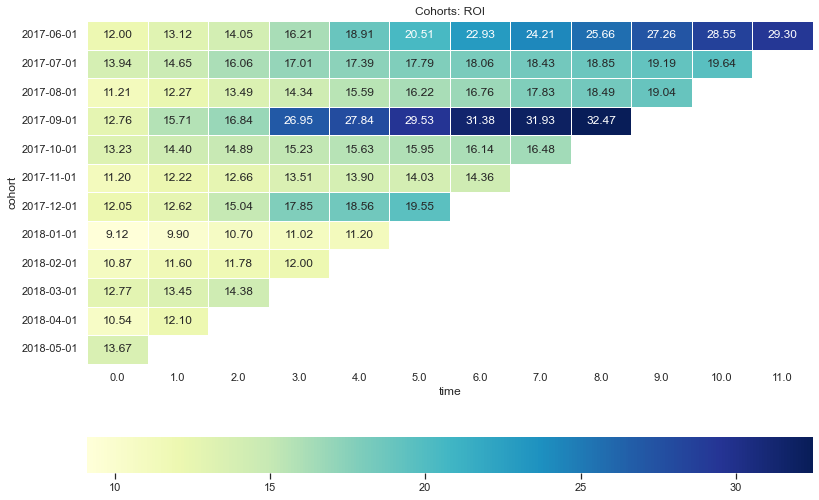

In [93]:
report_roi.index=report_roi.index.astype(str)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROI')
sns.heatmap(report_roi,cmap="YlGnBu", annot=True, fmt='.2f', linewidths=1, linecolor='white',  cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Cohorts: ROI')

plt.show()

<a class="anchor" id="step5"></a>
# Step 3. General Conclusion

- The universe of the study is formed by around 33000 users that visited the site approximated 360000 times.
<br> <br>
- The visits per day vary from 300 to 1600 approximately, with an average duration of each visit around 11 minutes.From the beginning of October to the end of March, there are more than 1000 visits a day probably due to seasonality.
<br> <br>
- The peak of visits was in November 24th 2017 - An anomaly caused by the Black Friday of this year. In March 31th 2018, maybe there was some technical problem, because there was only one active user visiting the site.
<br><br>
- The retention rate was checked by cohorts formed by the first visit to the platform. The cohort from June 2017 have the higher general retention during the period registering proportionally more visits than the others cohorts in a higher value of 7.4% and lower of 3.9% of repeating visits. The September 2017' cohort start with the higher retention for the first two months, but from then, registered less visits gradually untill reach 2.0% of returning visitors on the 8th month
<br><br>
- The rate of conversion is 16%, where the visits are converted in purchases. More than 50% of the purchases were made on the same day of the first visit. From 50 to 75% until 2 days after the first visit, showing a great value for conversion on those users that order something on the site. Also there are a few minority of 2600 users that made their first buy only after more than 90 days after the registration.
<br><br>
- From the almost 45600 purchases during this period, there are around 19000 orders made from aprox 6300 users that bought more than once in the platform.
<br><br>
- The higher average purchase size is comming from the cohort registered on September 2017 and December 2017, with a group expenditure of almost 160,00 for the first group and 100,00 for the second, but the best LTVs are in the December and June 2017 groups.
<br><br>
- The company spent a  total of marketing cost on the period is 329,131.62 to attract new clients. It was invested in the source 3 (141321.00) more than twice of the source 4 (610736.00), the second higher source.
<br><br>
- The data is showing a healthy business. Where the purchases are greater that the investment to acquire new clients.(LTV>CAC). The study of Cohorts is showing a positive ROI for all groups, specially with the September 2017 (32.47) and the June 2017 (29.30) cohorts.
<br><br>
- Looking at the ROI by sources we can see that the less effective is the one that is taking almost half of the budget: the source 3. It is important to evaluate the strategies for this source, and to see if it's possible to expand the aportation to the source 9 and 10 that are getting the higher returns of investment. 







